In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
train_path = "http://kaggle.shikanon.com/house-prices-advanced-regression-techniques/train.csv"
test_path = "http://kaggle.shikanon.com/house-prices-advanced-regression-techniques/test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Saving Ids
train_ID = train_df['Id']
test_ID = test_df['Id']

#Dropping Ids
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

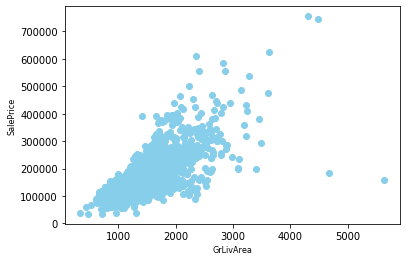

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], c = "skyblue")
plt.ylabel('SalePrice', fontsize=8)
plt.xlabel('GrLivArea', fontsize=8)
plt.show()

In [6]:
train_df.drop(train_df[(train_df['GrLivArea']>4000)&(train_df['GrLivArea']<30000)].index,inplace=True)

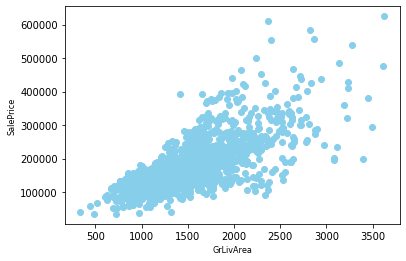

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], c = "skyblue")
plt.ylabel('SalePrice', fontsize=8)
plt.xlabel('GrLivArea', fontsize=8)
plt.show()

In [8]:
train_df['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

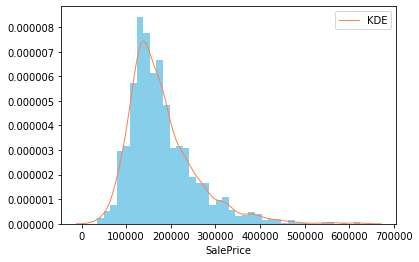

In [9]:
sns.distplot(train_df['SalePrice'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

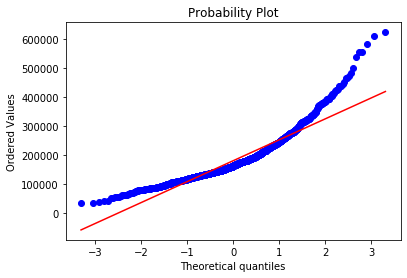

In [10]:
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], dist="norm", plot=plt)
plt.show()

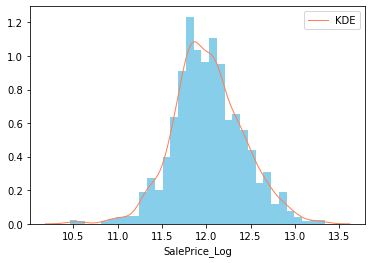

In [11]:
train_df['SalePrice_Log'] = np.log(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

Skewness: 0.065449
Kurtosis: 0.666438


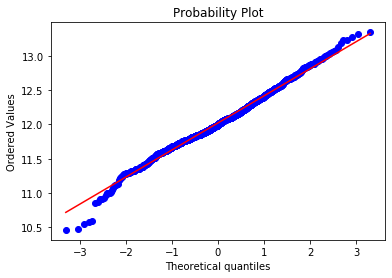

In [12]:
print("Skewness: %f" % train_df['SalePrice_Log'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Log'], plot=plt)
plt.show()

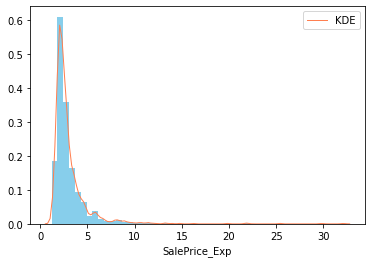

In [13]:
train_df['SalePrice_Exp'] = np.exp(train_df['SalePrice']/train_df['SalePrice'].mean())

sns.distplot(train_df['SalePrice_Exp'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

Skewness: 6.060076
Kurtosis: 56.822460


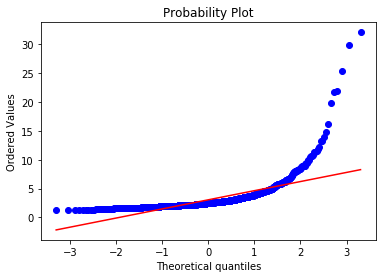

In [14]:
print("Skewness: %f" % train_df['SalePrice_Exp'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Exp'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Exp'], plot=plt)
plt.show()

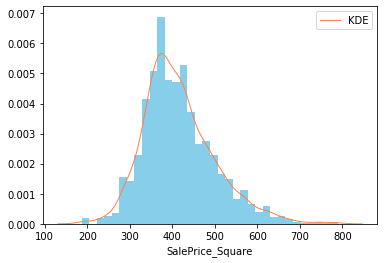

In [15]:
train_df['SalePrice_Square'] = train_df['SalePrice']**0.5

sns.distplot(train_df['SalePrice_Square'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

Skewness: 0.810797
Kurtosis: 1.245798


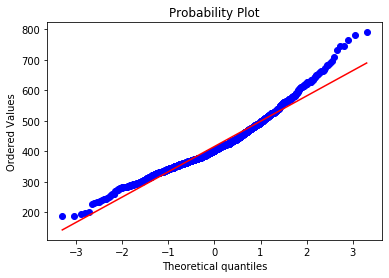

In [16]:
print("Skewness: %f" % train_df['SalePrice_Square'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Square'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Square'], plot=plt)
plt.show()

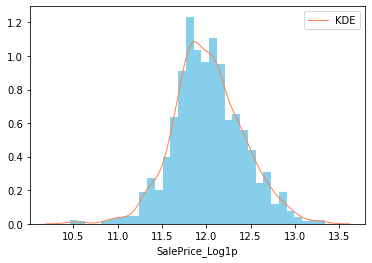

In [17]:
train_df['SalePrice_Log1p'] = np.log1p(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log1p'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

Skewness: 0.065460
Kurtosis: 0.666423


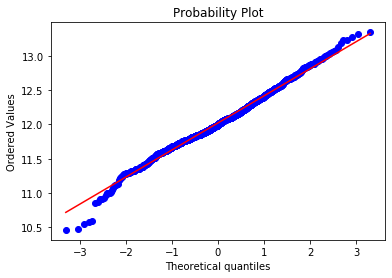

In [18]:
print("Skewness: %f" % train_df['SalePrice_Log1p'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log1p'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Log1p'], plot=plt)
plt.show()

In [19]:
del train_df['SalePrice_Square']
del train_df["SalePrice_Exp"]
del train_df['SalePrice_Log']

In [20]:
del train_df["SalePrice"]

In [21]:
size_train_df = train_df.shape[0]
size_test_df = test_df.shape[0]
target_variable = train_df['SalePrice_Log1p'].values
data = pd.concat((train_df, test_df),sort=False).reset_index(drop=True)
data.drop(['SalePrice_Log1p'], axis=1, inplace=True)

In [22]:
data.count().sort_values().head(20) # 通过 count 可以找出有缺失值的数据

PoolQC             8
MiscFeature      105
Alley            198
Fence            570
FireplaceQu     1495
LotFrontage     2429
GarageCond      2756
GarageYrBlt     2756
GarageFinish    2756
GarageQual      2756
GarageType      2758
BsmtExposure    2833
BsmtCond        2833
BsmtQual        2834
BsmtFinType2    2835
BsmtFinType1    2836
MasVnrType      2891
MasVnrArea      2892
MSZoning        2911
BsmtFullBath    2913
dtype: int64

Text(0.5, 1.0, 'Percent missing data by feature')

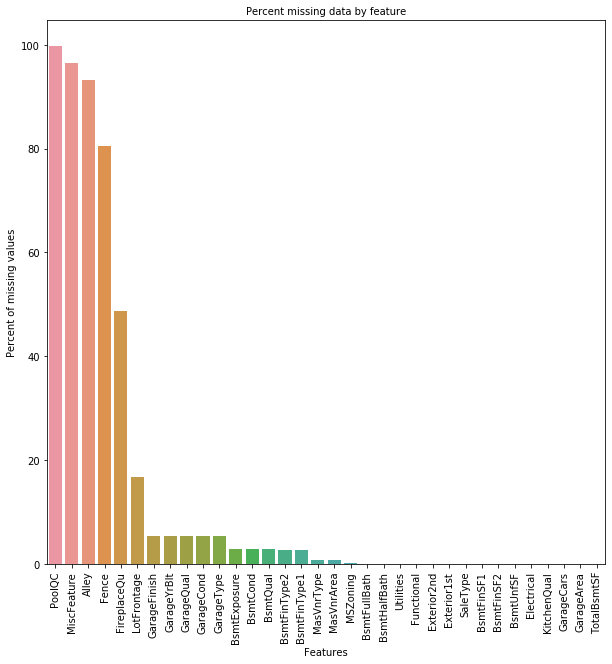

In [23]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

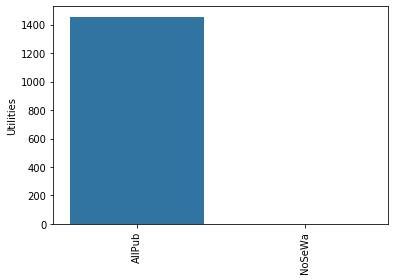

In [24]:
var = 'Utilities'
train_var_count = train_df[var].value_counts()
fig = sns.barplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90)

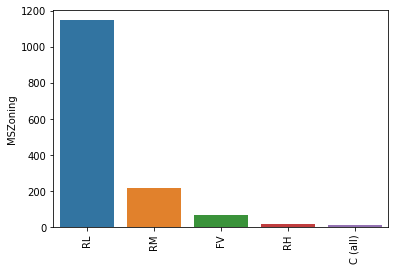

In [25]:
var = 'MSZoning'
train_var_count = train_df[var].value_counts()
fig = sns.barplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90);

In [26]:
features_fill_na_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MasVnrType']

In [27]:
features_fill_na_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
                      'BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF', 'TotalBsmtSF']

In [28]:
features_fill_na_mode = ["Functional", "MSZoning", "SaleType", "Electrical", 
                         "KitchenQual", "Exterior2nd", "Exterior1st"]

for feature_none in features_fill_na_none:
    data[feature_none].fillna('None',inplace=True)
    
for feature_0 in features_fill_na_0:
    data[feature_0].fillna(0,inplace=True)

for feature_mode in features_fill_na_mode:
    mode_value = data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    data[features_fill_na_mode] = data[features_fill_na_mode].fillna(mode_value)

In [29]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [30]:
data.drop(['Utilities'], axis=1,inplace=True)

In [31]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
data_na # data_na 为空

Series([], dtype: float64)

In [32]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [33]:
encode_cat_variables = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 
                        'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 
                        'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold')

numerical_features = [col for col in data.columns if col not in encode_cat_variables]
# for variable in encode_cat_variables:
#     lbl = LabelEncoder() 
#     lbl.fit(list(data[variable].values)) 
#     data[variable] = lbl.transform(list(data[variable].values))

for variable in data.columns:
    if variable not in encode_cat_variables:
        data[variable] = data[variable].apply(float)
    else:
        data[variable] = data[variable].apply(str)

print(data.shape)

data = pd.get_dummies(data)
print(data.shape)

(2915, 78)
(2915, 343)


In [34]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [35]:
print("Categorical Features: %d"%len(encode_cat_variables))
print("Numerical Features: %d"%len(numerical_features))

Categorical Features: 46
Numerical Features: 32


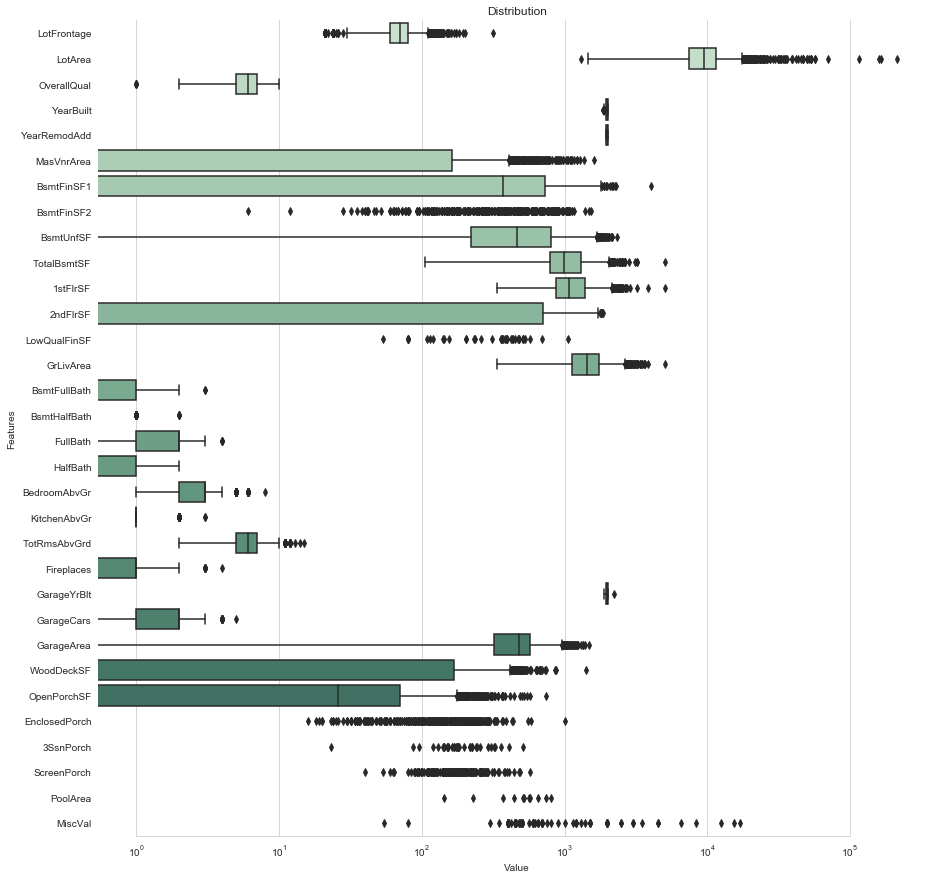

In [36]:
#Boxplot for numerical_features
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical_features] , orient="h", palette="ch:2.5,-.2,dark=.3")
ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

In [37]:
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
1stFlrSF          1.253011
LotFrontage       1.092709
GrLivArea         0.977860
BsmtFinSF1        0.974138
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
BsmtFullBath      0.622820
BedroomAbvGr      0.328129
GarageArea        0.217748
OverallQual       0.181902
FullBath          0.159917
GarageCars       -0.219402
YearRemodAdd     -0.449113
YearBuilt        -0.598087
GarageYrBlt      -3.903046
dtype: float64

In [38]:
skewed_features = skewed_features[abs(skewed_features) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewed_features.shape[0]))

from scipy.special import boxcox1p
skewed_features_name = skewed_features.index
lam = 0.15 # 超参数
for feat in skewed_features_name:
    tranformer_feat = boxcox1p(data[feat], lam)
    data[feat] = tranformer_feat

data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

There are 20 skewed numerical features to Box Cox transform


PoolArea         16.487849
3SsnPorch         8.918476
LowQualFinSF      8.737917
MiscVal           5.592866
BsmtHalfBath      3.798589
KitchenAbvGr      3.695780
ScreenPorch       2.975708
BsmtFinSF2        2.561989
EnclosedPorch     2.023182
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
MasVnrArea        0.636713
BsmtFullBath      0.622820
2ndFlrSF          0.329999
BedroomAbvGr      0.328129
WoodDeckSF        0.225571
GarageArea        0.217748
OverallQual       0.181902
LotArea           0.178523
1stFlrSF          0.173668
FullBath          0.159917
GrLivArea         0.102287
OpenPorchSF       0.100679
GarageCars       -0.219402
YearRemodAdd     -0.449113
BsmtFinSF1       -0.488447
YearBuilt        -0.598087
LotFrontage      -0.808022
BsmtUnfSF        -1.536727
GarageYrBlt      -3.922152
dtype: float64

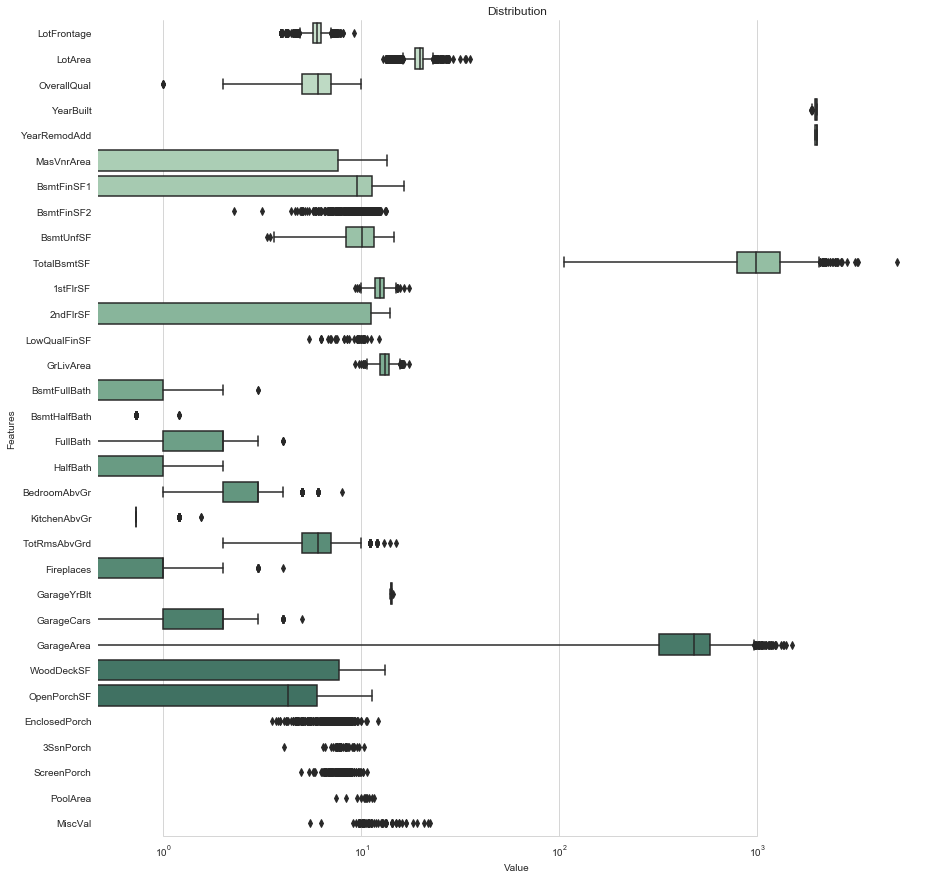

In [39]:
#Boxplot for numerical_features
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical_features] , orient="h", palette="ch:2.5,-.2,dark=.3")
ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

In [40]:
train = data[:size_train_df]
test = data[size_train_df:]

In [41]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, rmse
import xgboost as xgb
import lightgbm as lgb

ImportError: cannot import name 'rmse' from 'sklearn.metrics' (//anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, target_variable, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [42]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


NameError: name 'rmsle_cv' is not defined

In [43]:
KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))
score = rmsle_cv(KRR)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'rmsle_cv' is not defined

In [44]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'rmsle_cv' is not defined

In [45]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)

score = rmsle_cv(GBoost)
print("\Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'rmsle_cv' is not defined

In [46]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'xgb' is not defined

In [47]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'lgb' is not defined

In [48]:
alphas = [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]
cv_ridge_score = [rmsle_cv(make_pipeline(RobustScaler(), Lasso(alpha=alpha, random_state=1))).mean() 
            for alpha in alphas]

NameError: name 'rmsle_cv' is not defined

In [49]:
cv_ridge = pd.Series(cv_ridge_score, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

NameError: name 'cv_ridge_score' is not defined

In [50]:
train_size = int(len(train)*0.7)
X_train = train.values[:train_size]
X_test = train.values[train_size:]
y_train = target_variable[:train_size]
y_test = target_variable[train_size:]

0.7692863273409012


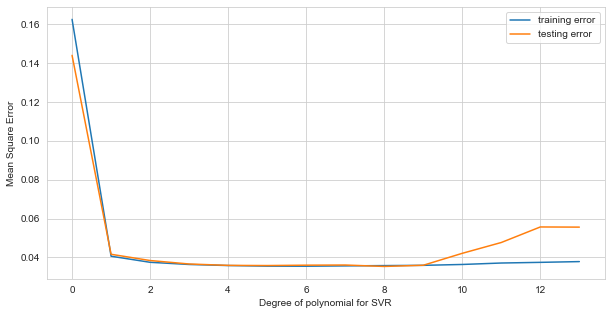

In [118]:
#Apply SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

svr = SVR(kernel='poly', degree=7, C=1.0, epsilon=0.2,gamma='scale')
svr.fit(X_train, y_train)

y_pred= svr.predict(X_test)
svr_score= r2_score(y_test, y_pred)
degree=14
print(svr_score)
axis= np.zeros(degree)
training = np.zeros(degree)
testing =np.zeros(degree)

for x in range(0,degree):
    svr = SVR(kernel='poly', degree=x, C=0.5, epsilon=0.2,gamma='scale')
    svr.fit(X_train, y_train)

    y_pred= svr.predict(X_test)
    y_train_pred= svr.predict(X_train)
    axis[x] =x
    training[x]= mean_squared_error(y_train, y_train_pred)
    testing[x]= mean_squared_error(y_test, y_pred)



fig, ax = plt.subplots(figsize = (10,5))


ax.plot(  axis, training, label='training error')
ax.plot(  axis, testing, label='testing error')
ax.legend()
ax.set_xlabel("Degree of polynomial for SVR")
ax.set_ylabel("Mean Square Error")

plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW3/ModelComplexityGraph.jpg')   

In [84]:
for x in range(5):
    print(x)

0
1
2
3
4


In [83]:
print(svr_score)

0.7692863273409012


In [57]:
GBoost.fit(X_train, y_train)
ENet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [ ]:
#partial residual plot

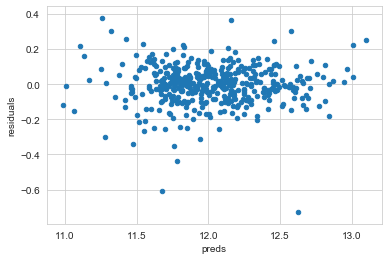

In [59]:
preds = pd.DataFrame({"preds":GBoost.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

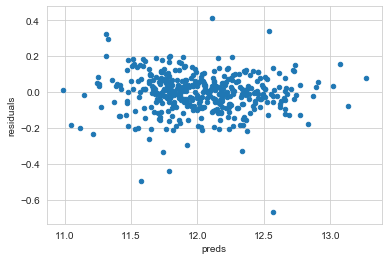

In [60]:
preds = pd.DataFrame({"preds":ENet.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

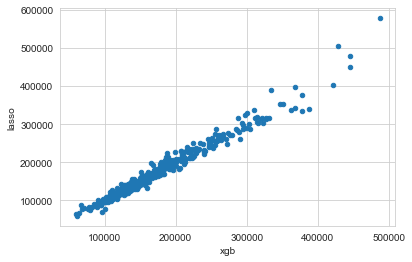

In [61]:
xgb_preds = np.expm1(GBoost.predict(X_test))
lasso_preds = np.expm1(ENet.predict(X_test))

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")